# **Exploration des données : Market_retail.csv**

## **Sommaire**
1. Introduction
   - Objectif de l'analyse
   - Présentation des données
2. Chargement des données
   - Importation des bibliothèques
   - Chargement du dataset
3. Compréhension des données
   - Aperçu des données (head, info, describe)
   - Description statistique
4. Vérification de la qualité des données
   - Recherche des valeurs manquantes
   - Identification des doublons
5. Analyse préliminaire des données
   - Exploration des segments, catégories et régions
   - Visualisation des distributions clés
6. Conclusion
   - Résumé des observations

<br>

---

### **1. Introduction**
- Objectif : Comprendre la structure du dataset `Market_retail.csv` et vérifier sa qualité avant d’entamer des analyses plus complexes.

- Données disponibles : Clients, segments, produits, remises, ventes, profits, etc.

<br>

---

### **2. Chargement des données**

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
chemin_fichier = "../data/brut/Market_retail.csv"
donnees = pd.read_csv(chemin_fichier)

### **3. Compréhension des données**

In [2]:
donnees.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,1/1/2011,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",$ 0.5,$ 45,$ -26,3,False
1,AZ-2011-9050313,1/3/2011,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",$ -,$ 854,$ 290,7,True
2,AZ-2011-6674300,1/4/2011,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",$ -,$ 140,$ 21,3,True
3,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",$ 0.5,$ 27,$ -22,2,True
4,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",$ 0.5,$ 17,$ -1,2,True


In [3]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       8047 non-null   object
 1   Order Date     8047 non-null   object
 2   Customer Name  8047 non-null   object
 3   Country        8047 non-null   object
 4   State          8047 non-null   object
 5   City           8047 non-null   object
 6   Region         8047 non-null   object
 7   Segment        8047 non-null   object
 8   Ship Mode      8047 non-null   object
 9   Category       8047 non-null   object
 10  Sub-Category   8047 non-null   object
 11  Product Name   8047 non-null   object
 12   Discount      8047 non-null   object
 13   Sales         8047 non-null   object
 14   Profit        8047 non-null   object
 15  Quantity       8047 non-null   int64 
 16  Feedback?      8047 non-null   bool  
dtypes: bool(1), int64(1), object(15)
memory usage: 1013.9+ KB


In [4]:
donnees.describe()

,Quantity
count,8047.000000
mean,3.772089
std,2.203369
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


#### **Analyse et préconisations de nettoyage des données :**

**1. Observation des données (`donnees.head()`) :**
- **Colonnes concernées :**

  - **`Order Date`** : Actuellement au format `object` (texte). Devrait être converti en format `datetime` pour faciliter les analyses temporelles.

  - **`Discount`**, **`Sales`**, **`Profit`** : Ces colonnes contiennent des valeurs monétaires en texte (exemple : `$ 0.5`, `$ 45`). Elles devraient être nettoyées pour :
    1. Supprimer les symboles monétaires (`$`).
    2. Convertir les valeurs en type `float`.

  - **`Feedback?`** : Contient des valeurs booléennes (`True`/`False`) mais semble bien formaté.

  - **`Product Name`, `City`, `State`, `Country`** : Ces colonnes sont catégoriques et bien définies.

**2. Structure des données (`donnees.info()`) :**
- **Aucune valeur manquante** : Toutes les colonnes contiennent 8047 valeurs non nulles.

- **Colonnes au format texte (`object`) :** De nombreuses colonnes catégoriques (par ex. `Region`, `Segment`, etc.) pourraient être converties en type `category` pour réduire la mémoire utilisée et accélérer les traitements.

**3. Statistiques descriptives (`donnees.describe()`) :**
- **Quantité (`Quantity`) :**

  - La moyenne est d’environ 3,77, avec une médiane de 3 et un maximum de 14. Cela semble raisonnable pour des données de vente.
  
  - Pas de valeurs aberrantes évidentes, mais les analyses devront vérifier si certaines valeurs extrêmes influencent les profits ou les remises.

#### **Nettoyage des données :**

In [5]:
# Conversion des dates au format date
donnees['Order Date'] = pd.to_datetime(donnees['Order Date'])

In [6]:
# Supprimer les espaces dans les intitulés des colonnes
donnees.columns = donnees.columns.str.strip()

In [7]:
# Nettoyer et convertir les colonnes monétaires
for col in ['Discount', 'Sales', 'Profit']:
    donnees[col] = (
        donnees[col]
        .astype(str)  # Convertir toutes les valeurs en chaînes
        .str.replace('$', '', regex=False)  # Supprimer le symbole $
        .str.replace(',', '', regex=False)  # Supprimer les séparateurs de milliers
        .str.strip()  # Supprimer les espaces inutiles
        .replace(r'^-$', '0', regex=True)  # Remplacer uniquement les tirets isolés par 0
        .astype(float)  # Convertir en float
    )


In [8]:
donnees.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27.0,-22.0,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17.0,-1.0,2,True


In [9]:
# Colonnes à convertir en type `category`
colonnes_categorique = ['Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Country']

# Conversion
for col in colonnes_categorique:
    donnees[col] = donnees[col].astype('category')

In [10]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8047 non-null   object        
 1   Order Date     8047 non-null   datetime64[ns]
 2   Customer Name  8047 non-null   object        
 3   Country        8047 non-null   category      
 4   State          8047 non-null   object        
 5   City           8047 non-null   object        
 6   Region         8047 non-null   category      
 7   Segment        8047 non-null   category      
 8   Ship Mode      8047 non-null   category      
 9   Category       8047 non-null   category      
 10  Sub-Category   8047 non-null   category      
 11  Product Name   8047 non-null   object        
 12  Discount       8047 non-null   float64       
 13  Sales          8047 non-null   float64       
 14  Profit         8047 non-null   float64       
 15  Quantity       8047 n

### **4. Vérification de la qualité des données**

In [11]:
# Vérification des valeurs manquantes
donnees.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [12]:
# Recherche de doublons
doublons = donnees[donnees.duplicated()]
print(f"Nombre de doublons : {len(doublons)}")

Nombre de doublons : 2


In [13]:
# Identifier les doublons exacts
doublons = donnees[donnees.duplicated(keep=False)]

print(doublons)

             Order ID Order Date      Customer Name  Country    State  \
2542  AZ-2012-5907386 2012-08-29       Louie Knight  Belgium  Antwerp   
2543  AZ-2012-5907386 2012-08-29       Louie Knight  Belgium  Antwerp   
4065  AZ-2013-5637964 2013-06-14  Cynthia Zielinski    Spain   Madrid   
4066  AZ-2013-5637964 2013-06-14  Cynthia Zielinski    Spain   Madrid   

          City   Region      Segment Ship Mode         Category Sub-Category  \
2542  Mechelen  Central     Consumer   Economy  Office Supplies          Art   
2543  Mechelen  Central     Consumer   Economy  Office Supplies          Art   
4065    Madrid    South  Home Office   Economy  Office Supplies      Binders   
4066    Madrid    South  Home Office   Economy  Office Supplies      Binders   

                            Product Name  Discount  Sales  Profit  Quantity  \
2542           Sanford Pens, Fluorescent       0.0   37.0    10.0         3   
2543           Sanford Pens, Fluorescent       0.0   37.0    10.0         3

In [14]:
# Suppression des doublons
donnees = donnees.drop_duplicates()

### **5. Analyse préliminaire des données**

- Distribution des segments : `Home Office`, `Consumer`, `Corporate`.
- Répartition des catégories et sous-catégories.
- Identifier les régions et leur importance dans les ventes/profits.

In [15]:
donnees.describe()

,Order Date,Discount,Sales,Profit,Quantity
count,8045,8045.000000,8045.000000,8045.000000,8045.000000
mean,2013-04-19 12:57:32.778123008,0.112194,291.903170,35.202237,3.772281
min,2011-01-01 00:00:00,0.000000,3.000000,-3060.000000,1.000000
25%,2012-06-08 00:00:00,0.000000,48.000000,1.000000,2.000000
50%,2013-06-11 00:00:00,0.000000,117.000000,14.000000,3.000000
75%,2014-04-30 00:00:00,0.100000,313.000000,47.000000,5.000000
max,2014-12-31 00:00:00,0.900000,6517.000000,2476.000000,14.000000
std,NaN,0.183064,485.258616,178.147747,2.203610


**Colonne : `Discount` (Remise)**

- **Min :** 0.0 (pas de remise pour certaines lignes).

- **Max :** 0.9 (90 % de remise maximum).

- **Moyenne :** 0.112 (11,2 %).

  - La remise moyenne accordée est relativement faible.

- **Quartiles :**

  - 25 % des commandes n’ont pas eu de remise (valeur = 0.0 au 1er quartile).

  - 50 % des commandes (médiane) n’ont pas eu de remise.

  - Au 75e percentile, les remises atteignent 10 %, montrant que les remises importantes (par exemple, près de 90 %) sont rares.

- **Interprétation :**

  - Les remises sont généralement faibles. On pourrait analyser si des remises élevées (ex. : près de 90 %) impactent négativement le profit.

---

**Colonne : `Sales` (Ventes)**

- **Min :** 3.0.

- **Max :** 6517.0.

  - Il existe une large variation dans les ventes unitaires.

- **Moyenne :** 291.90.

  - La plupart des commandes se situent dans cette zone, mais la présence de valeurs extrêmes (comme 6517.0) augmente la moyenne.

- **Quartiles :**

  - 25 % des ventes sont inférieures ou égales à 48.

  - 50 % des ventes (médiane) sont de 117.

  - 75 % des ventes sont inférieures ou égales à 313.

  - Cela montre que la majorité des ventes restent modestes, mais qu’il existe quelques grosses ventes (valeurs extrêmes).

- **Interprétation :**

  - Les valeurs extrêmes (exemple : 6517) pourraient être analysées pour voir si elles concernent des clients ou des produits spécifiques.

---

**Colonne : `Profit`**

- **Min :** -3060.0.

  - Des pertes importantes peuvent être observées dans certains cas.

- **Max :** 2476.0.

  - Le profit maximum sur une commande peut atteindre 2476.

- **Moyenne :** 35.2.

  - En moyenne, les commandes génèrent un faible profit.

- **Quartiles :**

  - 25 % des commandes ont un profit très faible (1.0 ou moins).

  - 50 % des commandes ont un profit médian de 14.0.

  - 75 % des commandes génèrent un profit inférieur ou égal à 47.

  - Les valeurs négatives dans les profits (pertes) pourraient être causées par des remises importantes ou des produits à faible marge.

- **Interprétation :**

  - Les commandes avec des pertes importantes (-3060) doivent être étudiées. Il est possible qu'elles soient liées à des remises excessives ou des erreurs.

---

**Colonne : `Quantity` (Quantité)**

- **Min :** 1.

- **Max :** 14.

- **Moyenne :** 3.77.

  - En général, les commandes concernent 3 à 4 unités d'un produit.

- **Quartiles :**

  - 25 % des commandes incluent 2 unités ou moins.

  - 50 % des commandes incluent 3 unités.

  - 75 % des commandes incluent 5 unités ou moins.

- **Interprétation :**

  - La plupart des commandes portent sur de faibles quantités. Les commandes avec des quantités élevées (proches de 14) peuvent être analysées pour comprendre leur impact sur les ventes et le profit.

---

**Premières recommandations :**

1. **Ventes (`Sales`) :**

   - Identifier les produits ou clients responsables des ventes élevées (proches de 6517) et leur impact sur le profit.

2. **Profit (`Profit`) :**

   - Analyser les commandes avec des pertes significatives (-3060) pour comprendre les causes (remises élevées, coûts élevés, etc.).

3. **Remises (`Discount`) :**

   - Vérifier si les remises élevées (90 %) sont corrélées aux pertes importantes.

4. **Quantité (`Quantity`) :**

   - Étudier les commandes avec des quantités élevées (par ex., 14) pour voir si elles affectent le profit et les ventes de manière disproportionnée.

5. **Analyse temporelle (`Order Date`) :**

   - Explorer les variations saisonnières ou annuelles des ventes, profits et remises pour optimiser les performances sur ces périodes.

#### **Proportion (%) des différents segments**

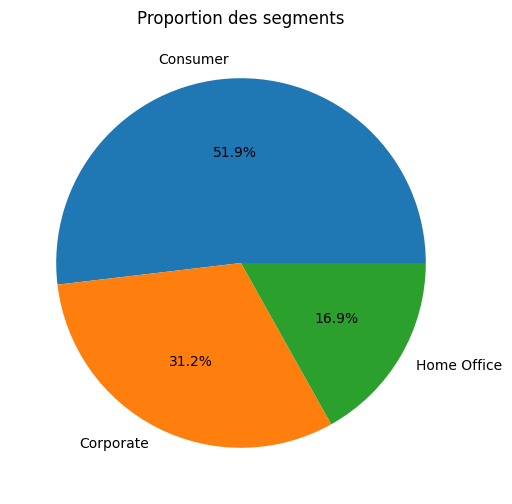

In [16]:
# Graphique de proportion des segments
import matplotlib.pyplot as plt

segments = donnees['Segment'].value_counts(normalize=True) * 100
segments.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), title='Proportion des segments')
plt.ylabel('')
plt.show()

#### **Évolution du bénéfice par année**

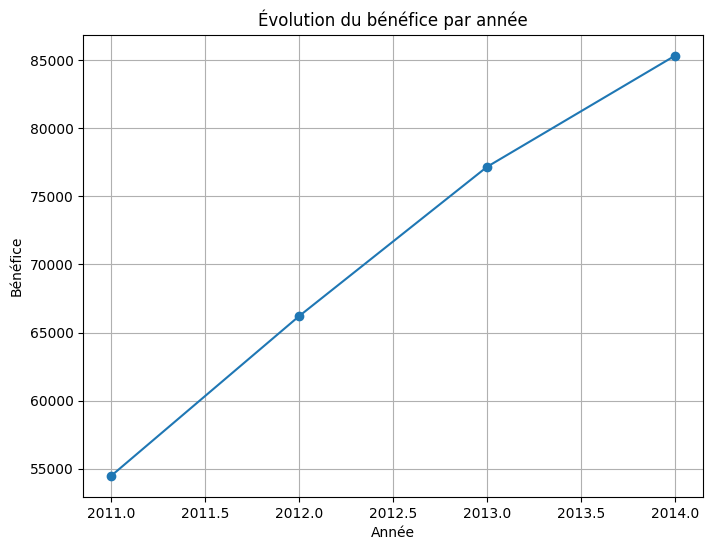

In [17]:
# Calculer le profit annuel
donnees['Année'] = donnees['Order Date'].dt.year
profit_annuel = donnees.groupby('Année')['Profit'].sum()

# Graphique de l'évolution du profit par année
profit_annuel.plot(kind='line', marker='o', figsize=(8, 6), title="Évolution du bénéfice par année", xlabel="Année", ylabel="Bénéfice")
plt.grid(True)
plt.show()


#### **Pays avec la plus grande quantité**

C:\Users\jpvt\AppData\Local\Temp\ipykernel_18548\3304225732.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantite_par_pays = donnees.groupby('Country')['Quantity'].sum().sort_values(ascending=False)


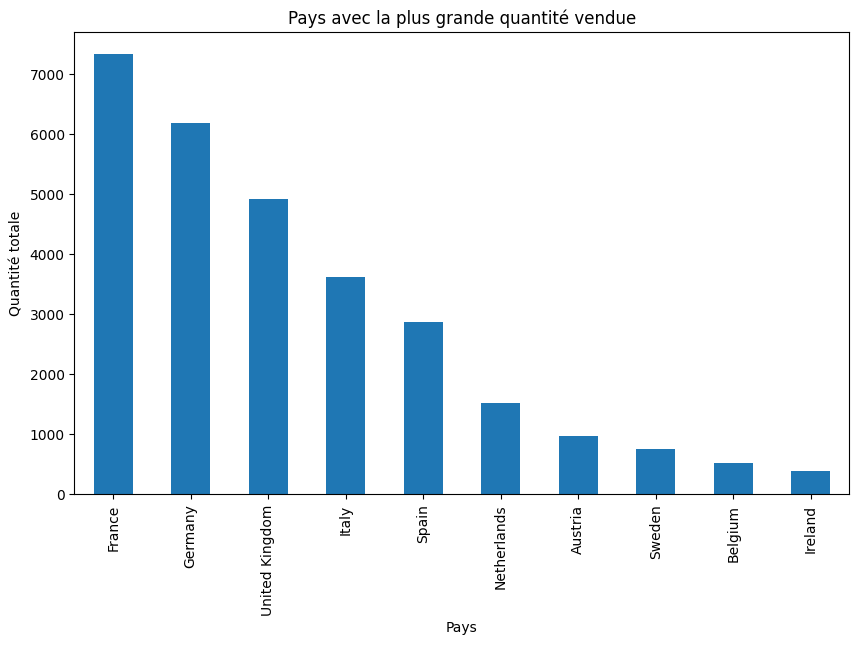

In [18]:
# Somme des quantités par pays
quantite_par_pays = donnees.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Barplot pour les pays avec la plus grande quantité
quantite_par_pays.head(10).plot(kind='bar', figsize=(10, 6), title="Pays avec la plus grande quantité vendue", xlabel="Pays", ylabel="Quantité totale")
plt.show()

#### **Corrélation entre profit et quantité**

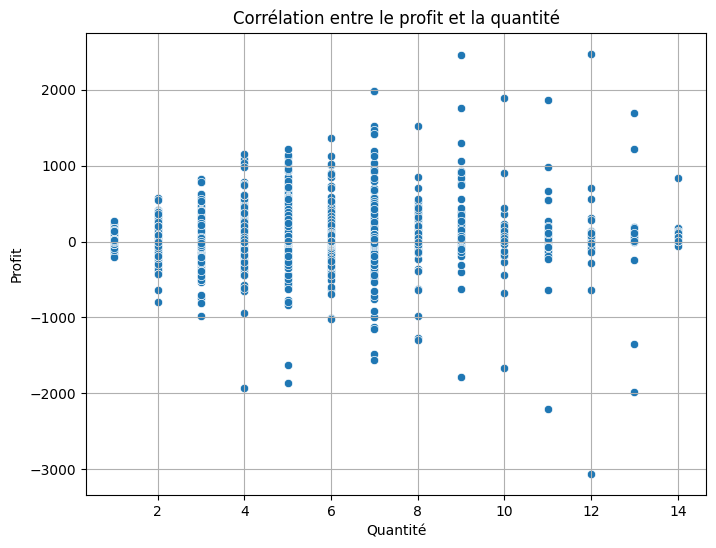

In [19]:
import seaborn as sns

# Scatter plot entre le profit et la quantité
plt.figure(figsize=(8, 6))
sns.scatterplot(data=donnees, x='Quantity', y='Profit')
plt.title("Corrélation entre le profit et la quantité")
plt.xlabel("Quantité")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


#### **Pays non rentable**

C:\Users\jpvt\AppData\Local\Temp\ipykernel_18548\2614408611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_pays = donnees.groupby('Country')['Profit'].sum().sort_values()


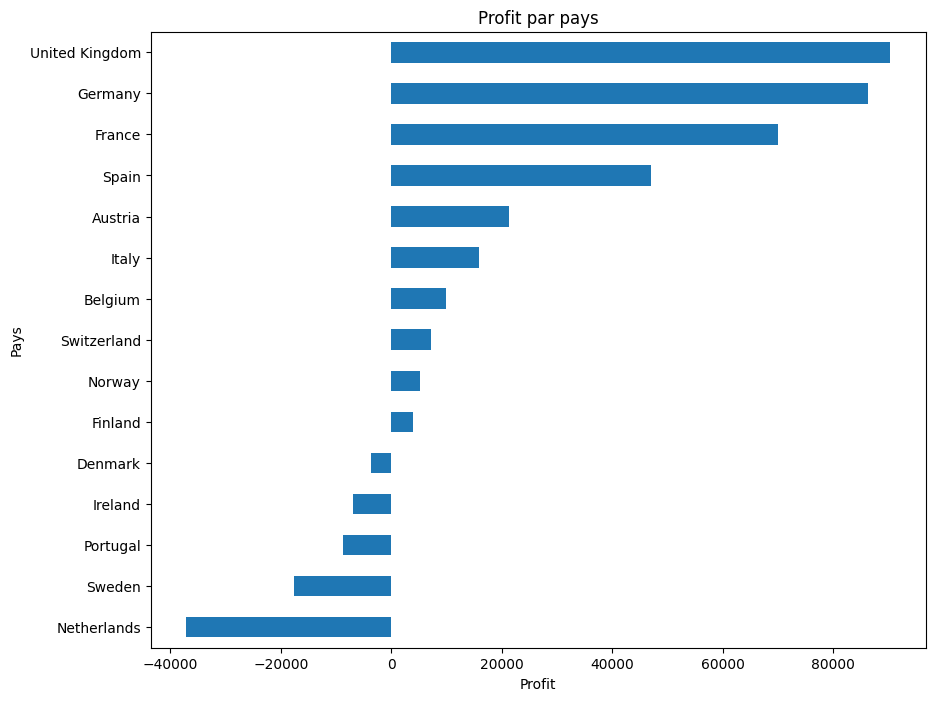

In [20]:
# Calcul du profit par pays
profit_pays = donnees.groupby('Country')['Profit'].sum().sort_values()

# Barplot pour visualiser les profits des pays
profit_pays.plot(kind='barh', figsize=(10, 8), title="Profit par pays")
plt.xlabel("Profit")
plt.ylabel("Pays")
plt.show()


#### **Segment avec la plus grande remise**

C:\Users\jpvt\AppData\Local\Temp\ipykernel_18548\3991632470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  remise_par_segment = donnees.groupby('Segment')['Discount'].mean()


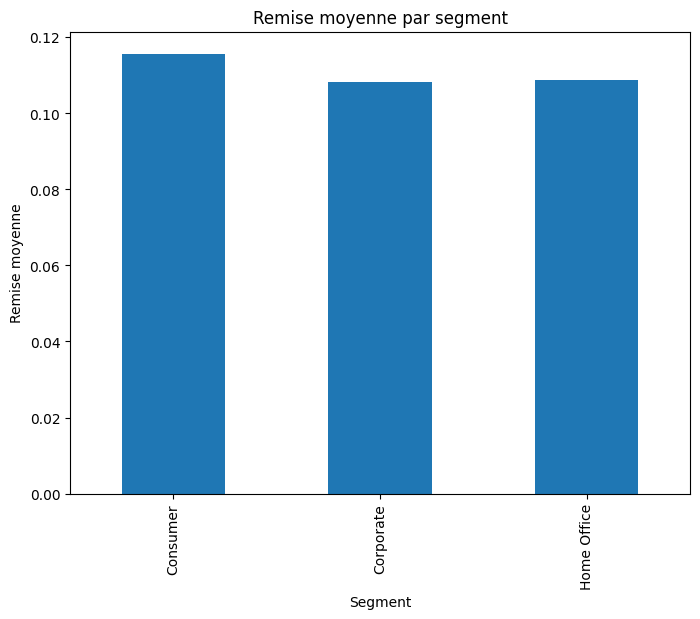

In [21]:
# Moyenne des remises par segment
remise_par_segment = donnees.groupby('Segment')['Discount'].mean()

# Barplot des remises par segment
remise_par_segment.plot(kind='bar', figsize=(8, 6), title="Remise moyenne par segment", xlabel="Segment", ylabel="Remise moyenne")
plt.show()


#### **Pays avec la plus grande remise**

C:\Users\jpvt\AppData\Local\Temp\ipykernel_18548\3160155842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  remise_par_pays = donnees.groupby('Country')['Discount'].mean().sort_values()


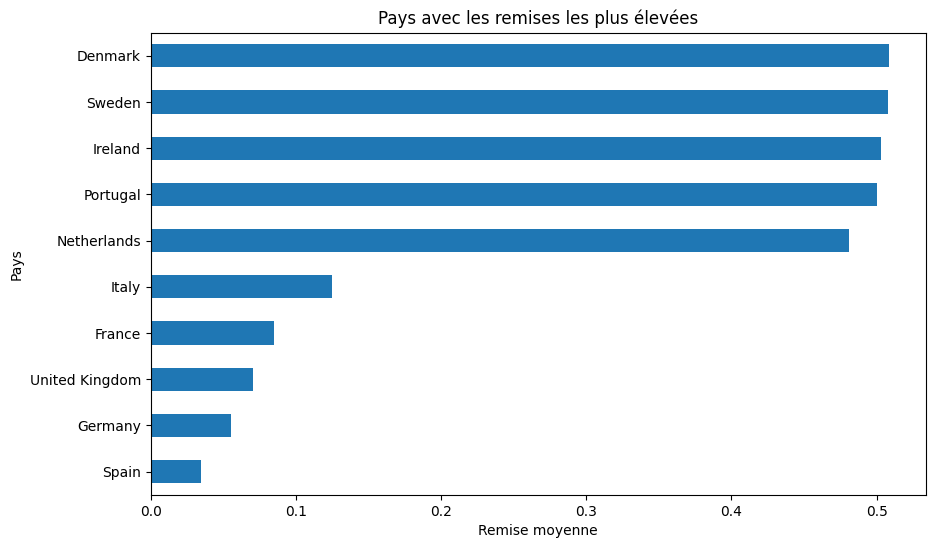

In [22]:
# Moyenne des remises par pays
remise_par_pays = donnees.groupby('Country')['Discount'].mean().sort_values()

# Barplot des remises par pays
remise_par_pays.tail(10).plot(kind='barh', figsize=(10, 6), title="Pays avec les remises les plus élevées")
plt.xlabel("Remise moyenne")
plt.ylabel("Pays")
plt.show()


#### **Mode d'expédition le plus courant**

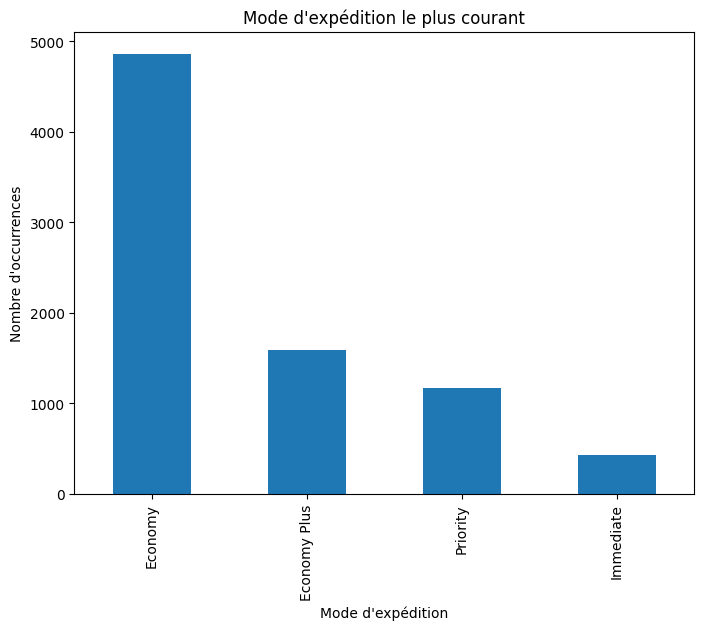

In [23]:
# Compter les occurrences de chaque mode d'expédition
expedition = donnees['Ship Mode'].value_counts()

# Barplot du mode d'expédition
expedition.plot(kind='bar', figsize=(8, 6), title="Mode d'expédition le plus courant", xlabel="Mode d'expédition", ylabel="Nombre d'occurrences")
plt.show()


#### **Corrélation Remise et Coût**

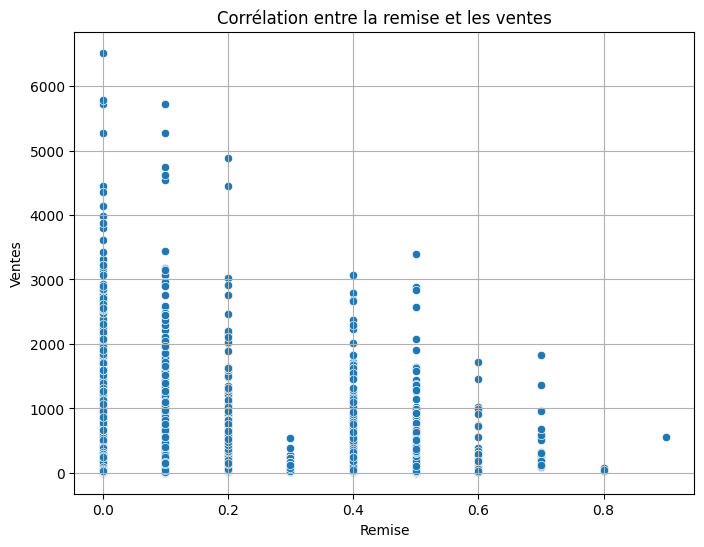

In [24]:
# Scatter plot entre remise et ventes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=donnees, x='Discount', y='Sales')
plt.title("Corrélation entre la remise et les ventes")
plt.xlabel("Remise")
plt.ylabel("Ventes")
plt.grid(True)
plt.show()


#### **Mode d'expédition et Feedback**

C:\Users\jpvt\AppData\Local\Temp\ipykernel_18548\3851201523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_expedition = donnees.groupby(['Ship Mode', 'Feedback?']).size().unstack()


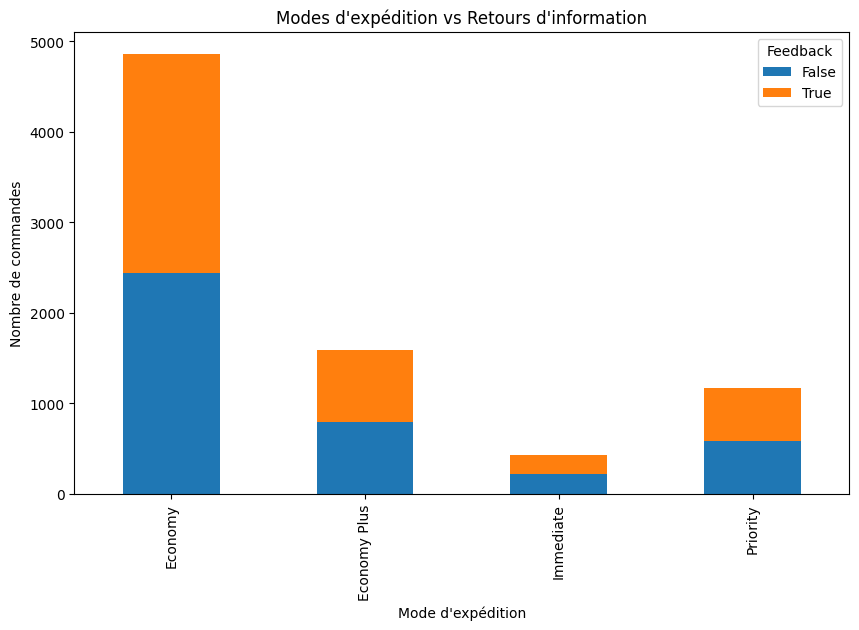

In [25]:
# Tableau croisé entre mode d'expédition et feedback
feedback_expedition = donnees.groupby(['Ship Mode', 'Feedback?']).size().unstack()

# Barplot empilé
feedback_expedition.plot(kind='bar', stacked=True, figsize=(10, 6), title="Modes d'expédition vs Retours d'information", ylabel="Nombre de commandes")
plt.xlabel("Mode d'expédition")
plt.legend(title="Feedback")
plt.show()


### **6. Conclusion**

**Résumé de l'EDA :**
L'analyse exploratoire montre plusieurs éléments clés dans les données :

1. **Répartition des segments :**
   - Le segment **Consumer** est dominant, suivi de **Corporate** et **Home Office**.
   - Les profits varient fortement selon les segments et régions, avec des opportunités de réduire les pertes observées dans certaines sous-catégories.

2. **Profits et remises :**
   - Les pays et segments offrant des remises élevées montrent souvent des profits négatifs. Les stratégies de remises doivent être optimisées.
   - Certaines catégories, bien que générant peu de ventes, maintiennent des marges bénéficiaires positives.

3. **Analyse des pays :**
   - Certains pays affichent une faible rentabilité (par ex., ventes élevées mais profits négatifs). Identifier les causes spécifiques (coûts logistiques, remises, produits non rentables).

4. **Modes d'expédition :**
   - Les modes d'expédition les plus utilisés (Economy et Economy Plus) pourraient être analysés pour évaluer leur impact sur la rentabilité.

5. **Corrélations :**
   - Une corrélation modérée est observée entre la quantité vendue et le profit. Les produits vendus en grande quantité ne sont pas nécessairement les plus rentables.

<br>

---

### **Préparation du DataSet pour PowerBi - Conversion en Français (Bonus)**

In [26]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8045 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8045 non-null   object        
 1   Order Date     8045 non-null   datetime64[ns]
 2   Customer Name  8045 non-null   object        
 3   Country        8045 non-null   category      
 4   State          8045 non-null   object        
 5   City           8045 non-null   object        
 6   Region         8045 non-null   category      
 7   Segment        8045 non-null   category      
 8   Ship Mode      8045 non-null   category      
 9   Category       8045 non-null   category      
 10  Sub-Category   8045 non-null   category      
 11  Product Name   8045 non-null   object        
 12  Discount       8045 non-null   float64       
 13  Sales          8045 non-null   float64       
 14  Profit         8045 non-null   float64       
 15  Quantity       8045 non-nu

In [27]:
# Conversion en Français des colonnes
noms_colonnes_francais = {
    "Order ID": "ID Commande",
    "Order Date": "Date Commande",
    "Customer Name": "Nom Client",
    "Country": "Pays",
    "State": "État",
    "City": "Ville",
    "Region": "Région",
    "Segment": "Segment",
    "Ship Mode": "Mode Livraison",
    "Category": "Catégorie",
    "Sub-Category": "Sous-Catégorie",
    "Product Name": "Nom Produit",
    "Discount": "Remise",
    "Sales": "Ventes",
    "Profit": "Profit",
    "Quantity": "Quantité",
    "Feedback?": "Retour?",
    "Année": "Année"
}

# Renommer les colonnes
donnees.rename(columns=noms_colonnes_francais, inplace=True)

# Vérification des nouveaux noms de colonnes
print(donnees.columns)


Index(['ID Commande', 'Date Commande', 'Nom Client', 'Pays', 'État', 'Ville',
       'Région', 'Segment', 'Mode Livraison', 'Catégorie', 'Sous-Catégorie',
       'Nom Produit', 'Remise', 'Ventes', 'Profit', 'Quantité', 'Retour?',
       'Année'],
      dtype='object')


In [28]:
donnees['Pays'].value_counts()

Pays
France            1916
Germany           1640
United Kingdom    1314
Italy              979
Spain              760
Netherlands        393
Austria            264
Sweden             203
Belgium            134
Ireland            100
Switzerland         78
Portugal            70
Norway              70
Finland             64
Denmark             60
Name: count, dtype: int64

In [ ]:
# Conversion des noms de pays
noms_pays_francais = {
    "France": "France",
    "Germany": "Allemagne",
    "United Kingdom": "Royaume-Uni",
    "Italy": "Italie",
    "Spain": "Espagne",
    "Netherlands": "Pays-Bas",
    "Austria": "Autriche",
    "Sweden": "Suède",
    "Belgium": "Belgique",
    "Ireland": "Irlande",
    "Switzerland": "Suisse",
    "Portugal": "Portugal",
    "Norway": "Norvège",
    "Finland": "Finlande",
    "Denmark": "Danemark"
}

donnees['Pays'] = donnees['Pays'].replace(noms_pays_francais)

In [32]:
donnees['Région'].value_counts()

Région
Central    4425
North      1811
South      1809
Name: count, dtype: int64

In [ ]:
# Conversion des régions
noms_régions = {
    "Central": "Centre",
    "North": "Nord",
    "South": "Sud"
}

donnees['Région'] = donnees['Région'].replace(noms_régions)

In [35]:
donnees['Segment'].value_counts()

Segment
Consumer       4173
Corporate      2514
Home Office    1358
Name: count, dtype: int64

In [ ]:
# Conversion des Segments
noms_segments_francais = {
    "Consumer": "Consommateur",
    "Corporate": "Entreprise",
    "Home Office": "Bureau"
}

donnees['Segment'] = donnees['Segment'].replace(noms_segments_francais)

In [38]:
donnees['Mode Livraison'].value_counts()

Mode Livraison
Economy         4860
Economy Plus    1590
Priority        1169
Immediate        426
Name: count, dtype: int64

In [ ]:
# Conversion des Modes de livraison
noms_livraison_francais = {
    "Economy": "Économique",
    "Economy Plus": "Économique Plus",
    "Priority": "Prioritaire",
    "Immediate": "Immédiat"
}

donnees['Mode Livraison'] = donnees['Mode Livraison'].replace(noms_livraison_francais)

In [41]:
donnees['Catégorie'].value_counts()

Catégorie
Office Supplies    5284
Technology         1523
Furniture          1238
Name: count, dtype: int64

In [ ]:
# Conversion des Catégories
noms_categories_francais = {
    "Office Supplies": "Fournitures de bureau",
    "Technology": "Technologie",
    "Furniture": "Mobilier"
}

donnees['Catégorie'] = donnees['Catégorie'].replace(noms_categories_francais)

In [44]:
donnees['Sous-Catégorie'].value_counts()

Sous-Catégorie
Art            1151
Binders        1058
Storage        1051
Phones          453
Bookcases       391
Furnishings     389
Chairs          383
Paper           374
Labels          372
Accessories     368
Copiers         367
Fasteners       350
Supplies        347
Envelopes       346
Machines        335
Appliances      235
Tables           75
Name: count, dtype: int64

In [ ]:
# Conversion des Sous-Catégories :
noms_sous_categories_francais = {
    "Art": "Art",
    "Binders": "Classeurs",
    "Storage": "Rangement",
    "Phones": "Téléphones",
    "Bookcases": "Bibliothèques",
    "Furnishings": "Mobilier",
    "Chairs": "Chaises",
    "Paper": "Papier",
    "Labels": "Étiquettes",
    "Accessories": "Accessoires",
    "Copiers": "Photocopieurs",
    "Fasteners": "Attaches",
    "Supplies": "Fournitures",
    "Envelopes": "Enveloppes",
    "Machines": "Machines",
    "Appliances": "Appareils",
    "Tables": "Tables"
}

donnees['Sous-Catégorie'] = donnees['Sous-Catégorie'].replace(noms_sous_categories_francais)

In [49]:
# Sauvegarde du dataset nettoyé
donnees.to_csv("../data/propre/Market_retail_nettoye.csv", index=False, encoding='utf-8')